# The Collective Benefit of Wearing Masks 
### 1. Masks 50% effective in either direction, worn by 50% of people

We're assuming random contacts between individuals in a population. Let's assume 50% mask effectiveness and 50% mask wearership. We're also assuming for the moment that masks are equally effective in either direction.

Here are the relative risk and likelihoods for all four disease transmission routes.

(😐 = non-mask wearer, 😷 = mask-wearer)

| Transmission Route       | Relative Risk     | Likelihood     |
| :------------- | :----------: | -----------: |
| **😐 -------------> 😐** | **1**  | **¼** |
| **😷 -‖-----------> 😐** | **½** | **¼** |
| **😐 -----------‖-> 😷** | **½** | **¼** |
| **😷  -‖---------‖-> 😷** | **¼** | **¼** |

- **Relative Risk to Mask-Wearers:** $$= (½ + ¼ ) / 2 = 0.375$$
- **Relative Risk to Non-Mask Wearers:** $$= (1 + ½) / 2 = 0.75$$
- **Average Relative Risk in Population:** $$= (0.75 + 0.375) / 2 = 0.5625$$

Non-mask wearers get a benefit, mask wearers get a substantial extra benefit, and the public as a whole gets a benefit that’s somewhere in between these two.



### 2. Solving the General Case 

Now let's extend the logic above to any values of mask effectiveness & wearership.

Let Eout & Ein be the mask effectiveness on exhalation and inhalation, and let p be the fraction of the population that wears a mask.

Here are the relative risk and likelihoods for all four disease transmission routes:

| Transmission Route       | Relative Risk of Infection     | Likelihood     |
| :------------- | :----------: | -----------: |
| **😐 -------------> 😐**  | $$1$$  | $$(1-p)^2$$ |
| **😷 -‖-----------> 😐** | $$1-E_{out}$$ |  $$p(1-p)$$ |
| **😐 -----------‖-> 😷** |  $$1-E_{in}$$ | $$(1-p)p$$ |
| **😷  -‖---------‖-> 😷** | $$(1-E_{out}) \cdot (1-E_{in})$$ | $$p^2$$ |

- **Average Relative Risk for Non-Mask Wearer**: $$(1 - E_{out} p)$$
- **Average Relative Risk for Mask-Wearer**: $$(1 - E_{out} p) \cdot (1 - E_{in})$$ 
- **Average Relative Risk for overall population:** ([derivation](https://www.wolframalpha.com/input/?i=FullSimplify%5B%281-p%29%5E2+%2B+%281-x%29*p*%281-p%29+%2B+%281-y%29*p*%281-p%29+%2B+%281-x%29*%281-y%29*p*p%5D)) $$(1 - E_{in} p) \cdot (1 - E_{out} p)$$ 
- [Interactive graph of above](https://www.desmos.com/calculator/cqsz9lvprf)

If the mask is equally effective in either direction, $$E_{out} = E_{in} = E$$ and so the Average Relative Risk for population becomes $$(1 - E \cdot p)^2$$

So for a 50% effective mask worn by 50% of the population, the relative risk is multiplied by a factor $$=(1 - 0.5*0.5)^2 = 0.5625$$ which is the same value in the simple case above. However we can now calculate this for any E & p. Notice that the factor simply depends on the product of mask effectiveness E & wearership p.

We can interpret this average relative risk as a multiplier on the effective contact rate due to the collective effect of mask wearing. (The contact rate is the probability of disease transmission given contact between a (contagious) infected and susceptible individual.) Since R0 is proportional to the effective contact rate, R0 will vary by the same factor.

## Graph of Effect of Masks on R0

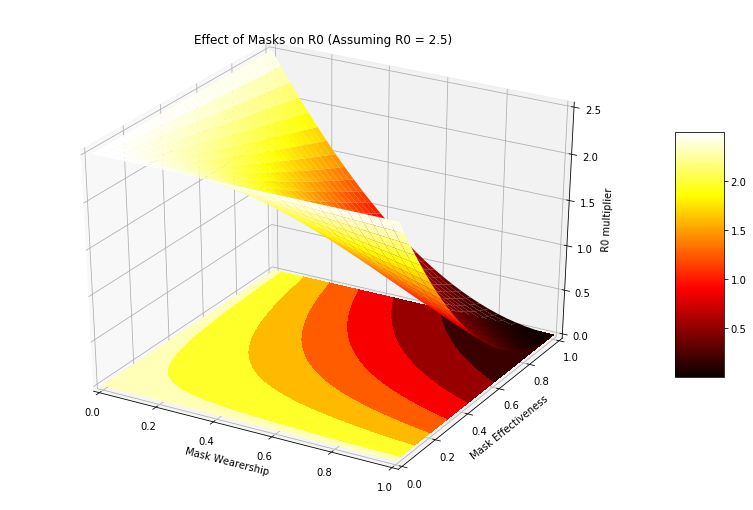

In [85]:
# https://www.geeksforgeeks.org/3d-surface-plotting-in-python-using-matplotlib/

# Import libraries 
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Creating dataset 
x = np.outer(np.linspace(0, 1, 32), np.ones(32)) 
y = x.copy().T # transpose 
z = 2.5 * (1-x*y)**2
  
# Creating figyre 
fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d') 
  
# Creating color map 
my_cmap = plt.get_cmap('hot') 
  
# Creating plot 
surf = ax.plot_surface(x, y, z,  
                       rstride = 1, 
                       cstride = 1, 
                       alpha = 1, 
                       cmap = my_cmap) 
cset = ax.contourf(x, y, z, 
                   zdir ='z', 
                   offset = np.min(z), 
                   cmap = my_cmap) 
cset = ax.contourf(x, y, z, 
                   zdir ='x', 
                   offset =-5, 
                   cmap = my_cmap) 
cset = ax.contourf(x, y, z,  
                   zdir ='y', 
                   offset = 5, 
                   cmap = my_cmap) 
fig.colorbar(surf, ax = ax,  
             shrink = 0.5, 
             aspect = 5) 
  
# Adding labels 
ax.set_xlabel('Mask Wearership') 
ax.set_xlim(0, 1) 
ax.set_ylabel('Mask Effectiveness') 
ax.set_ylim(0, 1) 
ax.set_zlabel('R0 multiplier') 
ax.set_zlim(np.min(z), np.max(z)) 
ax.set_title('Effect of Masks on R0 (Assuming R0 = 2.5)') 
  
# show plot 
plt.show() 

Note that the quadratic dependence leads to a steeper than linear falloff on increasing p, i.e. a small increase in p has a quadratic effect on lowering R0. If 70% of people wore a 70% effective mask, the effect would be to lower R0 by a factor of 4.

### From R0 to Probability of Infection

Assuming a SIR model, we can use the relation $$R_0 = -log(1- P)/P$$ (see [Brienen et al](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1539-6924.2010.01428.x) or page 27 of [this pdf](https://web.stanford.edu/~jhj1/teachingdocs/Jones-Epidemics050308.pdf) here for derivation) where P is the probability of infection. 

This allows us to transform this graph into a graph of infection probability (given a particular R0, mask efficacy E and mask wearership p).

The [solution](https://www.wolframalpha.com/input/?i=Solve%5BR0+%3D+-log%281-+P%29%2FP%2C+P%5D) involves the Lambert W function aka the product log function.

$$P = 1 + \frac{W(R e^{-R})}{R}$$

where $R$ is the values of $R_0$ reduced by mask wearing, i.e.

$$R = R_0 \cdot (1 - E_{in} p) \cdot (1 - E_{out} p)$$

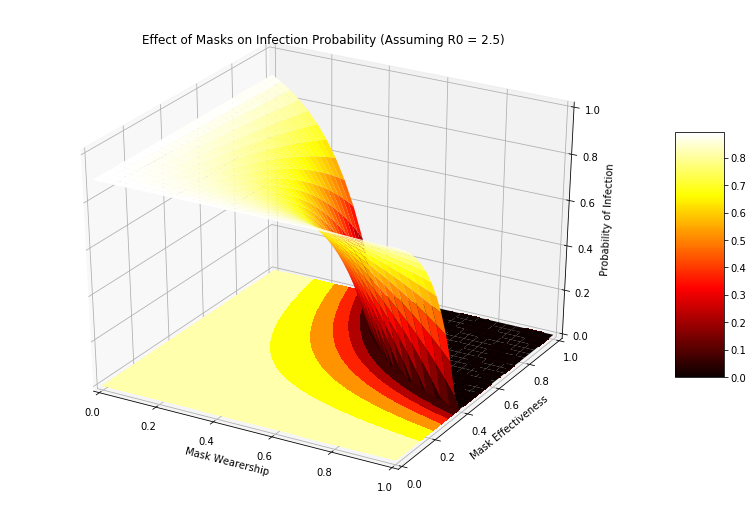

In [88]:
from scipy.special import lambertw

# Creating dataset 
eps = 10**-6
x = np.outer(np.linspace(0, 1, 32), np.ones(32)) + eps
y = x.copy().T # transpose 
R = 2.5 * (1-x*y)**2
z = 1 + np.real(lambertw(-R * np.exp(-R)))/R

# Creating figyre 
fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d') 
  
# Creating color map 
my_cmap = plt.get_cmap('hot') 
  
# Creating plot 
surf = ax.plot_surface(x, y, z,  
                       rstride = 1, 
                       cstride = 1, 
                       alpha = 1, 
                       cmap = my_cmap) 
cset = ax.contourf(x, y, z, 
                   zdir ='z', 
                   offset = 0, 
                   cmap = my_cmap) 
cset = ax.contourf(x, y, z, 
                   zdir ='x', 
                   offset =-5, 
                   cmap = my_cmap) 
cset = ax.contourf(x, y, z,  
                   zdir ='y', 
                   offset = 5, 
                   cmap = my_cmap) 
fig.colorbar(surf, ax = ax,  
             shrink = 0.5, 
             aspect = 5) 
  
# Adding labels 
ax.set_xlabel('Mask Wearership') 
ax.set_xlim(0, 1) 
ax.set_ylabel('Mask Effectiveness') 
ax.set_ylim(0, 1) 
ax.set_zlabel('Probability of Infection') 
ax.set_zlim(0, 1) 
ax.set_title('Effect of Masks on Infection Probability (Assuming R0 = 2.5)') 
  
# show plot 
plt.show() 

So the probability of infection has a steeper dependence on mask wearership & mask efficacy, as compared to R0.


### Comparison with Literature

This model is essentially the same as in [Tian et al](https://arxiv.org/ftp/arxiv/papers/2003/2003.07353.pdf) (Table S3 & Figure S4 in supplemental info) also referenced in [Howard et al](https://www.preprints.org/manuscript/202004.0203/v1?fbclid=IwAR0h7PBSAB6ZEcr-DzBaTTIEV9kjvJiRZA7Eassb-rs75raKtOKIVKWcsFk) (Fig 1), and is consistent with the simulation results of [Eikenberry et al](https://www.sciencedirect.com/science/article/pii/S2468042720300117). [Fisman et al](https://www.sciencedirect.com/science/article/pii/S2468042720300191) also assume a similar model of bidirectionally effective masks (although they proceed to extend these results by relaxing the random mixing assumption).

However other work such as [Ngonghala et al](Mathematical assessment of the impact of non-pharmaceutical interventions
on curtailing the 2019 novel Coronavirus) (Fig 8), [Stutt et all](https://royalsocietypublishing.org/doi/pdf/10.1098/rspa.2020.0376) (Fig 3 & 4), or [Brienen et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7169241/) find a linear relationship between R0 and E*p (product of mask effectiveness and wearership). This is likely because they either implicitly or explicitly assume masks filter in only one direction. We can recreate their results by manually setting either Ein or Eout = 0, which results in a linear relationship.